In [2]:
import pandas as pd
import numpy as np
import os 

# Set max columns
pd.set_option('display.max_columns', None)

DATADIR = 'data/2020'

# Set paths
DPU = os.path.join(DATADIR, 'dpu-vu.csv')
CAPS = os.path.join(DATADIR, 'caps.csv')
SAVES = os.path.join(DATADIR, 'saves-vu.csv')
PESD = os.path.join(DATADIR, 'pesd.csv')

# DPU

In [29]:
# Load file
dpu = pd.read_csv(DPU, sep=',')

In [31]:
dpu.TIPO.unique()

array(['DGRC', 'ASP', 'MOP', 'NCON', 'GMTR', 'APR', 'ESTQ', 'ELEC',
       'FTES', 'RDOS', 'FCIO', nan, 'FLDS'], dtype=object)

In [27]:
# Keep principals columns
dpu = dpu[['PJI', 'ELEMNTO Final', 'INCIDENTE Final', 'Code Localisation', 'Dém.', 'Code regroupement de pilotage', 'IMPUTACIONDép.', 'IMPUTACION Ate.', 'IMPUTACIONUET', 'DECLARACION Horodate', 'DECLARACION Point', 'IN/OFF Usine', 'IN/OFF Départ.']]

KeyError: "['ELEMNTO Final', 'IN/OFF Départ.', 'DECLARACION Horodate', 'IN/OFF Usine', 'Dém.', 'Code Localisation', 'IMPUTACION Ate.', 'IMPUTACIONDép.', 'IMPUTACIONUET', 'DECLARACION Point', 'Code regroupement de pilotage', 'INCIDENTE Final'] not in index"

In [24]:
# Rename them
dpu.rename(columns={'Code regroupement de pilotage':'TIPODEF', 'IMPUTACION Ate.':'TALLER', 'IMPUTACIONUET':'UET', 'Dém.':'GRAVEDAD', 'IMPUTACIONDép.':'DPTO', 'Famille':'FLIA','Type':'TIPO', 'ELEMNTO Final':'ELE', 'INCIDENTE Final':'INC', 'Code Localisation':'LOC', 'IN/OFF Usine':'IN/OFF USINA', 'IN/OFF Départ.':'IN/OFF DPTO', 'DECLARACION Horodate':'FECHA', 'DECLARACION Point':'ZONA'}, inplace=True)

In [6]:
# Replace for homogenezation from differents DBs
dpu['DPTO'].replace({'DCHAP':'SOLDADURA', 'DPINT':'PINTURA', 'DMONT':'MONTAJE', 'MONTVU':'MONTAJE', 'EMB':'EMBUTICION', 'DAT':'DIVD'}, inplace=True)
# Add audit for identification
dpu['AUDI'] = 'DPU'

In [7]:
dpu

,PJI,ELE,INC,LOC,GRAVEDAD,TIPODEF,DPTO,TALLER,UET,FECHA,ZONA,IN/OFF USINA,IN/OFF DPTO,AUDI
0,655182000588,14RP,2233,,NaN,NaN,MONTAJE,CH-ME,621,27/06/2018 03:13:57 PM,R055,IN,OFF,DPU
1,655182000588,17RP,3310,,NaN,NaN,MONTAJE,CH-ME,621,27/06/2018 03:26:44 PM,R053,IN,OFF,DPU
2,655182000588,1820,0756,1A261,NaN,NaN,MONTAJE,CH-ME,621,28/06/2018 08:22:18 AM,GSFI,IN,OFF,DPU
3,655182000588,3110,0756,1A203,NaN,NaN,NaN,NaN,???,26/06/2018 10:23:21 AM,GSFA,IN,IN,DPU
4,655182000588,3308,2170,,NaN,NaN,MONTAJE,CH-ME,654,17/07/2018 10:01:57 AM,CSC,IN,OFF,DPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172367,655200310051,4505,1001,W73,NaN,ASP,DIVD,INGEN,300,22/11/2019 06:48:50 AM,GSPI,IN,IN,DPU
172368,655200310051,4514,1180,T54,NaN,ASP,PINTURA,PTAL2,484,22/11/2019 06:48:50 AM,GSPI,IN,IN,DPU
172369,655200310051,5130,4300,,NaN,NCON,PINTURA,PTAL2,484,26/11/2019 07:14:24 AM,CSC1,OFF,OFF,DPU
172370,655200310051,5216,0240,,NaN,ASP,SQF,SQF,151,25/11/2019 10:20:15 AM,CM09,IN,IN,DPU


# CAPS

In [162]:
# Load file
caps = pd.read_csv(CAPS)

In [163]:
caps['INC'] = caps['INC'].astype(str).str.zfill(4)
caps['ELE'] = caps['ELE'].astype(str).str.zfill(4)
caps = caps[~caps.PJI.isna()]
caps['PJI'] = caps['PJI'].astype(int).astype(str)
caps.rename(columns={'FECHA':'DECL', 'DEM':'GVD'}, inplace=True)
caps = caps[['DECL','DPTO','PJI','INC','ELE','GVD']]
caps['AUDI'] = 'CAPS'

In [164]:
caps

,DECL,DPTO,PJI,INC,ELE,GVD,AUDI
0,27/01/2020 09:00:00,SOLD,655200530232,0180,4120,P2,CAPS
1,27/01/2020 09:00:00,PINT,655200420197,1010,4466,P2,CAPS
2,27/01/2020 09:00:00,PINT,655200450172,1110,4420,P2,CAPS
3,27/01/2020 09:00:00,PINT,655200450172,1180,4412,P2,CAPS
4,27/01/2020 09:00:00,PINT,655200420197,1270,4414,P2,CAPS
...,...,...,...,...,...,...,...
626,21/12/2020 09:00:00,SOLD,655205220057,4200,0180,P2,CAPS
627,21/12/2020 09:00:00,PINT,655205110066,4375,1170,P2,CAPS
628,23/12/2020 09:00:00,SOLD,655210140010,4320,0440,P2,CAPS
629,23/12/2020 09:00:00,SOLD,655210140041,4417,0230,P2,CAPS


In [165]:
caps.DECL = pd.to_datetime(caps.DECL)

# SAVES

In [87]:
# Load file
saves = pd.read_csv(SAVES, sep=',')

In [53]:
saves.drop(columns='Unnamed: 0', inplace=True)

In [92]:
saves['DECL'] = pd.to_datetime(saves['DECL'] + ' 12:00:00')

In [93]:
saves

,Unnamed: 0,DECL,PJI,ELE,INC,GVD,DPTO,ZONA,TIPO,AUDI
0,0,2020-01-27 12:00:00,655200410196,4514,1270,V2,PINTURA,CSCS3,ASP,SAVES
1,1,2020-01-29 12:00:00,655200520153,4313,1510,V2,MONTAJE,NaN,DGRC,SAVES
2,2,2020-01-29 12:00:00,655200520153,4508,1053,V2,SOLDADURA,CSCS3,ASP,SAVES
3,3,2020-01-30 12:00:00,655200520149,5611,8311,V2,RUIDOS,NaN,RDOS,SAVES
4,4,2020-01-31 12:00:00,655200450139,5611,8311,V2,RUIDOS,NaN,RDOS,SAVES
...,...,...,...,...,...,...,...,...,...,...
444,444,2020-12-30 12:00:00,655205140123,4502,1000,V2,DIVD,NaN,ASP,SAVES
445,445,2020-12-30 12:00:00,655205210023,4380,1020,V2,PINTURA,NaN,ASP,SAVES
446,446,2020-12-30 12:00:00,655205210023,5611,4040,V2,MONTAJE,NaN,ASP,SAVES
447,447,2020-12-30 12:00:00,655205220021,4502,1000,V2,DIVD,NaN,ASP,SAVES


In [41]:
# Get incident and element separalately and keep principals columns
saves[['INC','ELE']] = saves['Codigo'].str.split("-",expand=True)
saves = saves[['Día','Num. de Identificacion', 'ELE', 'INC', 'DEMERITO','DPTO', 'ZONA', 'DETECCION', 'GRUPOS']]

KeyError: 'Codigo'

In [42]:
# Rename cols
saves.rename(columns={'Día':'FECHA', 'Num. de Identificacion':'PJI', 'GRUPOS':'TIPODEF', 'DEMERITO':'GRAVEDAD'}, inplace=True)

In [17]:
# Data homogenezation
saves['TIPODEF'].replace({'ASPECTO': 'ASP', 'GEOMETRIA':'GMTR', 'MODO OPERATORIO':'MOP', 'FUNCIONAMIENTO':'FCIO', 'RUIDOS':'RDOS', 'DEGRADACION':'DGRC', 'FALTANTE':'FTES', 'NO CONFORME':'NCON'}, inplace=True)

In [18]:
# Add audi
saves['AUDI'] = 'SAVES'

# PESD

In [64]:
pesd = pd.read_csv(PESD)

In [65]:
pesd

,MES,PJI avec défaut,Famille,Defecto,Démérite,Libellé élément,Libellé incident,Quantité,Code Localisation,Commentaire,Libellé département imputé,Code UET imputée,Point de déclaration,Code ponce du déclarant,Libellé du ponce,Horodatage de déclaration2,Point de captage de retouche,Code ponce du retoucheur,Horodatage de retouche,Code regroupement de pilotage,Familia,Detección,Defecto2,Codigo Elemento,Codigo Detección
0,1,655200340151,XND,BATERIAPROTECTOR LIBRE O NO APRETADO,V2,BATERIA,PROTECTOR LIBRE O NO APRETADO,1,NaN,SE TORQUEO SOPORTE BATERIA,MONTAJE VU,621,PESD,RUC,RUSEK CHRISTIAN ADRI,16/01/20 06:50,RFIN,FDO,16/01/20,MOP,MODO OPERATORIO,NaN,XND PROTECTOR LIBRE O NO APRETADO-BATERIA,1820,4891
1,7,655202330058,XND,VOLANTE DE DIRECCIONRAYADO,V2,VOLANTE DE DIRECCION,RAYADO,35,NaN,NaN,MONTAJE VU,621,PESD,RUC,RUSEK CHRISTIAN ADRI,07/07/20 09:43,RFIN,FDO,07/07/20,MOP,MODO OPERATORIO,NaN,XND RAYADO-VOLANTE DE DIRECCION,3308,2330
2,1,655200330162,XND,SERVOFRENOJUNTA MAL POSICIONADA,NaN,SERVOFRENO,JUNTA MAL POSICIONADA,1,NaN,NaN,MONTAJE VU,600,PESD,RUC,RUSEK CHRISTIAN ADRI,15/01/20 11:35,RFIN,FMP,15/01/20,MOP,MODO OPERATORIO,NaN,XND JUNTA MAL POSICIONADA-SERVOFRENO,3610,4932
3,1,655200330211,XND,FRENO DE MANOMAL REGLADO : MUY ALTO,NaN,FRENO DE MANO,MAL REGLADO : MUY ALTO,1,NaN,NaN,MONTAJE VU,621,PESD,RUC,RUSEK CHRISTIAN ADRI,08/01/20 10:32,RFIN,GIS,08/01/20,MOP,MODO OPERATORIO,NaN,XND MAL REGLADO : MUY ALTO-FRENO DE MANO,3650,4531
4,2,655201410001,XND,LLANTA DE RUEDA ARD.RAYADO,NaN,LLANTA DE RUEDA ARD.,RAYADO,1,NaN,NaN,MONTAJE VU,648,PESD,RUC,RUSEK CHRISTIAN ADRI,27/02/20 06:28,FB01,GIS,27/02/20,MOP,MODO OPERATORIO,NaN,XND RAYADO-LLANTA DE RUEDA ARD.,3904,2330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,12,655210140012,XND,REBATIDO DE PORTONBURBUJAS EN MASTICO,NaN,REBATIDO DE PORTON,BURBUJAS EN MASTICO,6,GRAL,NaN,PINTURA,DIP,PESD,RUC,RUSEK CHRISTIAN ADRI,30/12/20 09:06,RFIN,GIS,30/12/20,ASP,ASPECTO,NaN,XND BURBUJAS EN MASTICO-REBATIDO DE PORTON,4502,1000
2158,12,655210140033,XND,HAYON / PORTONDURO DE CERRAR,V2,HAYON / PORTON,DURO DE CERRAR,6,NaN,NaN,SOLDADURA,659,PESD,RUC,RUSEK CHRISTIAN ADRI,30/12/20 10:03,RET,FDO,30/12/20,GMTR,GEOMETRIA,NaN,XND DURO DE CERRAR-HAYON / PORTON,7887,3220
2159,12,655210140033,XND,PARACHOQUES AV.DETERIORADO,V2,PARACHOQUES AV.,DETERIORADO,6,K74,NaN,MONTAJE VU,654,PESD,RUC,RUSEK CHRISTIAN ADRI,30/12/20 10:03,RET,FDO,30/12/20,NCON,NO CONFORME,NaN,XND DETERIORADO-PARACHOQUES AV.,5215,4450
2160,12,655210140033,XND,PUERTA AVI.DEPOSITO DE PARTICULAS,V2,PUERTA AVI.,DEPOSITO DE PARTICULAS,6,H54,NaN,PINTURA,483,PESD,RUC,RUSEK CHRISTIAN ADRI,30/12/20 10:03,RET,FDO,30/12/20,ASP,ASPECTO,NaN,XND DEPOSITO DE PARTICULAS-PUERTA AVI.,4401,1190


In [66]:
# Keep principal columns and rename cols
pesd = pesd[['PJI avec défaut','Codigo Elemento', 'Codigo Detección', 'Démérite', 'Code Localisation', 'Libellé département imputé', 'Code UET imputée', 'Point de déclaration', 'Familia','Horodatage de déclaration2']]

In [67]:
pesd

,PJI avec défaut,Codigo Elemento,Codigo Detección,Démérite,Code Localisation,Libellé département imputé,Code UET imputée,Point de déclaration,Familia,Horodatage de déclaration2
0,655200340151,1820,4891,V2,NaN,MONTAJE VU,621,PESD,MODO OPERATORIO,16/01/20 06:50
1,655202330058,3308,2330,V2,NaN,MONTAJE VU,621,PESD,MODO OPERATORIO,07/07/20 09:43
2,655200330162,3610,4932,NaN,NaN,MONTAJE VU,600,PESD,MODO OPERATORIO,15/01/20 11:35
3,655200330211,3650,4531,NaN,NaN,MONTAJE VU,621,PESD,MODO OPERATORIO,08/01/20 10:32
4,655201410001,3904,2330,NaN,NaN,MONTAJE VU,648,PESD,MODO OPERATORIO,27/02/20 06:28
...,...,...,...,...,...,...,...,...,...,...
2157,655210140012,4502,1000,NaN,GRAL,PINTURA,DIP,PESD,ASPECTO,30/12/20 09:06
2158,655210140033,7887,3220,V2,NaN,SOLDADURA,659,PESD,GEOMETRIA,30/12/20 10:03
2159,655210140033,5215,4450,V2,K74,MONTAJE VU,654,PESD,NO CONFORME,30/12/20 10:03
2160,655210140033,4401,1190,V2,H54,PINTURA,483,PESD,ASPECTO,30/12/20 10:03


In [68]:
pesd.rename(columns={'PJI avec défaut':'PJI', 'Démérite':'GVD', 'Departamento':'DPTO', 'Code Localisation':'LOC', 'Code UET imputée':'UET', 'Point de déclaration':'ZONA','Horodatage de déclaration2':'DECL','Libellé regt incident':'TIPODEF', 'Codigo Elemento':'ELE', 'Codigo Detección':'INC', 'Libellé département imputé':'DPTO', 'Familia':'TIPO'}, inplace=True)

/home/gerac/.local/lib/python3.9/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [69]:
# Data homogenization
pesd['TIPO'].replace({'ASPECTO-INCI':'ASP',
                      'ASPECTO':'ASP',
                         'GEOMETRIA':'GMTR', 
                         'DEGRADACIONES':'DGRC', 
                         'MODO OPERATORIO/PROCESO':'MOP', 
                         'MODO OPERATORIO':'MOP', 
                         'APRIETES-INCI':'APR', 
                         'NO CONFORME':'NCON', 
                         'FALTANTES':'FTES', 
                         'DEFECTOS ELÉCTRICOS PEV-GRETEL':'ELEC', 
                         'ELECTRICOS-INCI.':'ELEC',
                         'ESTANQUEIDAD':'ESTQ', 
                          'FUNCIONAMIENTO':'FCIO',
                         'LLENADOS / FLUIDOS-INCI.':'FLDS', 
                         'RUIDOS':'RDOS'}, 
                        inplace=True)

/home/gerac/.local/lib/python3.9/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [70]:
pesd.TIPO.unique()

array(['MOP', 'GMTR', 'ASP', 'DGRC', 'NCON', 'FCIO', 'RDOS', nan, 'FTES'],
      dtype=object)

In [71]:
pesd['DPTO'].replace({'MONTAJE VU':'MONT',
                    'PINTURA':'PINT',
                    'SOLDADURA':'SOLD',
                      'DEPARTAMENTO  CHAPA':'SOLD',
                      'EMBUTICION':'EMBU',
                      'DEPARTAMENTO PINTURA':'PINT',
                      'MONTAJE VP':'MONT',
                      'DEPARTAMENTO LOGISTICA INDUSTRIAL':'DLI',
                      'CALIDAD DE PIEZAS':'SQF'
                     }, inplace=True)

In [72]:
# Add audi
pesd['AUDI']='PESD'

<ipython-input-72-1cc1ffa439e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pesd['AUDI']='PESD'


In [80]:
pesd['DECL'] = pd.to_datetime(pesd['DECL'])

<ipython-input-80-85cc77423f1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pesd['DECL'] = pd.to_datetime(pesd['DECL'])


In [73]:
pesd.to_csv('pesd-vu.csv')

# Joined DF

In [157]:
caps

,DECL,DPTO,PJI,INC,ELE,DEM,AUDI
0,2020-01-27 09:00:00,SOLD,655200530232,0180,4120,P2,CAPS
1,2020-01-27 09:00:00,PINT,655200420197,1010,4466,P2,CAPS
2,2020-01-27 09:00:00,PINT,655200450172,1110,4420,P2,CAPS
3,2020-01-27 09:00:00,PINT,655200450172,1180,4412,P2,CAPS
4,2020-01-27 09:00:00,PINT,655200420197,1270,4414,P2,CAPS
...,...,...,...,...,...,...,...
626,2020-12-21 09:00:00,SOLD,655205220057,4200,0180,P2,CAPS
627,2020-12-21 09:00:00,PINT,655205110066,4375,1170,P2,CAPS
628,2020-12-23 09:00:00,SOLD,655210140010,4320,0440,P2,CAPS
629,2020-12-23 09:00:00,SOLD,655210140041,4417,0230,P2,CAPS


In [166]:
# Concat DBs
df = pd.concat([caps, saves, dpu, pesd], sort=True)

In [167]:
df.drop(columns='Unnamed: 0', inplace=True)

In [168]:
df.to_csv('2020.csv')
#df.DECL = pd.to_datetime(df.DECL)

In [211]:
df2 = pd.read_csv('2020.csv')

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [212]:
df2.DECL = pd.to_datetime(df2.DECL)

In [213]:
# Data homogenization
df2['GVD'].replace({'P2':'V2', 
                       'V2F':'V2',
                       'V1+':'V1',
                       'V1C':'V1',
                       'V3':'V2',
                       'P1':'V1',
                       'V1F':'V1',
                       'V1C':'V1',
                       'V1B':'V1',
                       'V1D':'V1',
                       'V1A':'V1',
                       'V2B':'V2'}, inplace=True)

In [214]:
df2.GVD.fillna('V2', inplace=True)

In [221]:
df2.to_csv('2020clean.csv')

In [208]:
df2 = df2.drop(['Unnamed: 0', 'RETO', 'MADU'], axis=1)

In [210]:
df2.drop(columns=['TIMEREPA'])

,AUDI,DECL,DPTO,ELE,GVD,INC,INOFFDPTO,INOFFUSI,LOC,PJI,TALL,TIPO,UET,ZONA
0,CAPS,2020-01-27 09:00:00,SOLD,4120,V2,180,NaN,NaN,NaN,655200530232,NaN,NaN,NaN,NaN
1,CAPS,2020-01-27 09:00:00,PINT,4466,V2,1010,NaN,NaN,NaN,655200420197,NaN,NaN,NaN,NaN
2,CAPS,2020-01-27 09:00:00,PINT,4420,V2,1110,NaN,NaN,NaN,655200450172,NaN,NaN,NaN,NaN
3,CAPS,2020-01-27 09:00:00,PINT,4412,V2,1180,NaN,NaN,NaN,655200450172,NaN,NaN,NaN,NaN
4,CAPS,2020-01-27 09:00:00,PINT,4414,V2,1270,NaN,NaN,NaN,655200420197,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235533,PESD,2020-12-30 09:06:00,PINT,4502,V2,1000,NaN,NaN,GRAL,655210140012,NaN,ASP,DIP,PESD
235534,PESD,2020-12-30 10:03:00,SOLD,7887,V2,3220,NaN,NaN,NaN,655210140033,NaN,GMTR,659,PESD
235535,PESD,2020-12-30 10:03:00,MONT,5215,V2,4450,NaN,NaN,K74,655210140033,NaN,NCON,654,PESD
235536,PESD,2020-12-30 10:03:00,PINT,4401,V2,1190,NaN,NaN,H54,655210140033,NaN,ASP,483,PESD


In [73]:
df['ZONA'].value_counts(normalize=True, dropna=False).head(20)

GSPI    0.390303
CSC1    0.214329
SRET    0.129687
TCM     0.046596
STRA    0.031270
BOUT    0.017840
GEGS    0.016370
FILI    0.011746
SIGN    0.009386
GSC1    0.009173
ST2B    0.009067
CM05    0.008933
GSFR    0.008790
GSFI    0.008523
TRI1    0.006733
CM02    0.006632
CM01    0.006115
FRM     0.004374
GSTA    0.004288
FB01    0.004214
Name: ZONA, dtype: float64

In [25]:
# Drop na rows in PJI col
df.dropna(subset=['PJI'], inplace=True)

In [26]:
# Set type for cols
df['PJI'] = df['PJI'].astype(int).astype(str)
df['ELE'] = df['ELE'].astype(str)
df['INC'] = df['INC'].astype(str)
df['LOC'] = df['LOC'].astype(str)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198887 entries, 3 to 25666
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AUDI          198887 non-null  object
 1   DETECCION     842 non-null     object
 2   DPTO          198325 non-null  object
 3   ELE           198887 non-null  object
 4   FECHA         198887 non-null  object
 5   GRAVEDAD      43231 non-null   object
 6   IN/OFF DPTO   172372 non-null  object
 7   IN/OFF USINA  172372 non-null  object
 8   INC           198887 non-null  object
 9   LOC           198887 non-null  object
 10  PJI           198887 non-null  object
 11  TALLER        172351 non-null  object
 12  TIPODEF       193268 non-null  object
 13  UET           198037 non-null  object
 14  ZONA          198256 non-null  object
dtypes: object(15)
memory usage: 24.3+ MB


In [28]:
# Set date as datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.sort_values(by='FECHA', inplace=True)
# Filter by year
df = df[df['FECHA']>='2019']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187721 entries, 27 to 167367
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   AUDI          187721 non-null  object        
 1   DETECCION     842 non-null     object        
 2   DPTO          187182 non-null  object        
 3   ELE           187721 non-null  object        
 4   FECHA         187721 non-null  datetime64[ns]
 5   GRAVEDAD      32654 non-null   object        
 6   IN/OFF DPTO   171783 non-null  object        
 7   IN/OFF USINA  171783 non-null  object        
 8   INC           187721 non-null  object        
 9   LOC           187721 non-null  object        
 10  PJI           187721 non-null  object        
 11  TALLER        171771 non-null  object        
 12  TIPODEF       182969 non-null  object        
 13  UET           186871 non-null  object        
 14  ZONA          187090 non-null  object        
dtypes: datetime64[ns

In [30]:
# Set date as datetimeindex
df.set_index('FECHA', inplace=True)

In [31]:
# Set ID for each default
df['ID'] = range(1, len(df) + 1)

In [32]:
# Fill default without gravity as V2
df['GRAVEDAD'].fillna('V2', inplace=True)

# Some plots

In [80]:
test = df.groupby([df.index.isocalendar().week, df['GRAVEDAD'], df['AUDI']]).count()
audi_gvt = test['ID'].unstack(level=-1).unstack(level=-1).fillna(0)

In [34]:
test = df.groupby([df.index.date, df['GRAVEDAD'], df['TIPODEF']]).count()
audi_flia = test['ID'].unstack(level=-1).unstack(level=-1).fillna(0)

In [81]:
audi_gvt

AUDI     CAPS          DPU           PESD         SAVES      
GRAVEDAD   V1    V2     V1      V2     V1      V2    V1    V2
week                                                         
1         0.0   0.0   18.0   517.0    0.0     0.0   1.0   5.0
2         0.0   6.0  318.0  3054.0    0.0     0.0   0.0   9.0
5         0.0   0.0    0.0    16.0   70.0   878.0   0.0   0.0
6         0.0  12.0  365.0  3525.0  217.0  1621.0   0.0  12.0
7         0.0   5.0    0.0    20.0   76.0  1270.0   1.0   5.0
9         0.0   0.0    6.0   480.0  101.0  1821.0   0.0  18.0
10        0.0  10.0  252.0  3688.0    0.0     0.0   0.0   6.0
11        0.0   3.0  119.0  2932.0  112.0  1550.0   1.0  10.0
12        0.0   0.0  171.0  4606.0   91.0  1233.0   1.0  19.0
13        0.0   0.0  135.0  3228.0   48.0   543.0   0.0  13.0
14        0.0   0.0   58.0  1226.0   43.0   313.0   0.0   0.0
15        0.0  11.0  400.0  3517.0   84.0   705.0   1.0  13.0
16        0.0   0.0  144.0  3659.0   46.0   346.0   0.0  12.0
17        0.0   0.0  235.0  5389.0   81.0   541.0   1.0  14.0
18        0.0   0.0   90.0  1983.0   15.0   165.0   0.0   3.0
19        1.0  13.0  287.0  3010.0   61.0   420.0   0.0  12.0
20        0.0   0.0  248.0  5703.0   84.0   611.0   1.0  15.0
21        0.0   0.0  146.0  3501.0   47.0   478.0   0.0  12.0
22        0.0   0.0   11.0   195.0    0.0     0.0   0.0   0.0
23        0.0  10.0  260.0  2703.0    0.0     0.0   0.0  10.0
24        0.0   2.0  217.0  2424.0   41.0   216.0   0.0   3.0
25        0.0   0.0  123.0  3719.0   54.0   315.0   0.0   0.0
26        0.0   0.0  267.0  6817.0   87.0   704.0   0.0  13.0
27        0.0   0.0    5.0   202.0    0.0     0.0   0.0   6.0
28        0.0  13.0  202.0  2187.0    0.0     0.0   0.0   8.0
29        0.0   0.0  586.0  4782.0    0.0     0.0   0.0   0.0
30        0.0   0.0  581.0  5236.0    0.0     0.0   1.0  19.0
31        0.0   0.0  366.0  4455.0    0.0     0.0   0.0  17.0
32        0.0   6.0  243.0  3062.0    0.0     0.0   0.0   4.0
33        1.0  18.0  414.0  4137.0    0.0     0.0   1.0  13.0
34        2.0  36.0  530.0  5369.0    0.0     0.0   1.0  19.0
35        1.0  33.0  564.0  5716.0    0.0     0.0   1.0  16.0
36        0.0   4.0  198.0  3386.0    0.0     0.0   1.0   3.0
37        1.0   5.0  207.0  1898.0    0.0     0.0   1.0   8.0
38        1.0  30.0  524.0  5372.0    0.0     0.0   0.0  14.0
39        0.0  40.0  487.0  6419.0    0.0     0.0   1.0  15.0
40        1.0   7.0  216.0  4105.0    0.0     0.0   0.0  10.0
41        0.0   0.0   89.0   892.0    0.0     0.0   0.0   3.0
42        0.0   7.0  573.0  5978.0    0.0     0.0   0.0  12.0
43        0.0  14.0  633.0  7417.0    0.0     0.0   0.0  12.0
44        0.0  35.0  602.0  6601.0    0.0     0.0   1.0  15.0
45        0.0   8.0  198.0  3203.0    0.0     0.0   0.0   6.0
46        0.0   9.0  328.0  2174.0    0.0     0.0   0.0   5.0
47        0.0  12.0  677.0  3995.0    0.0     0.0   1.0  11.0
48        0.0  15.0  221.0  1178.0    0.0     0.0   1.0  11.0
49        1.0   6.0  237.0  4279.0    0.0     0.0   1.0  13.0
50        1.0   6.0  126.0  1151.0    0.0     0.0   0.0   2.0

<AxesSubplot:xlabel='week'>

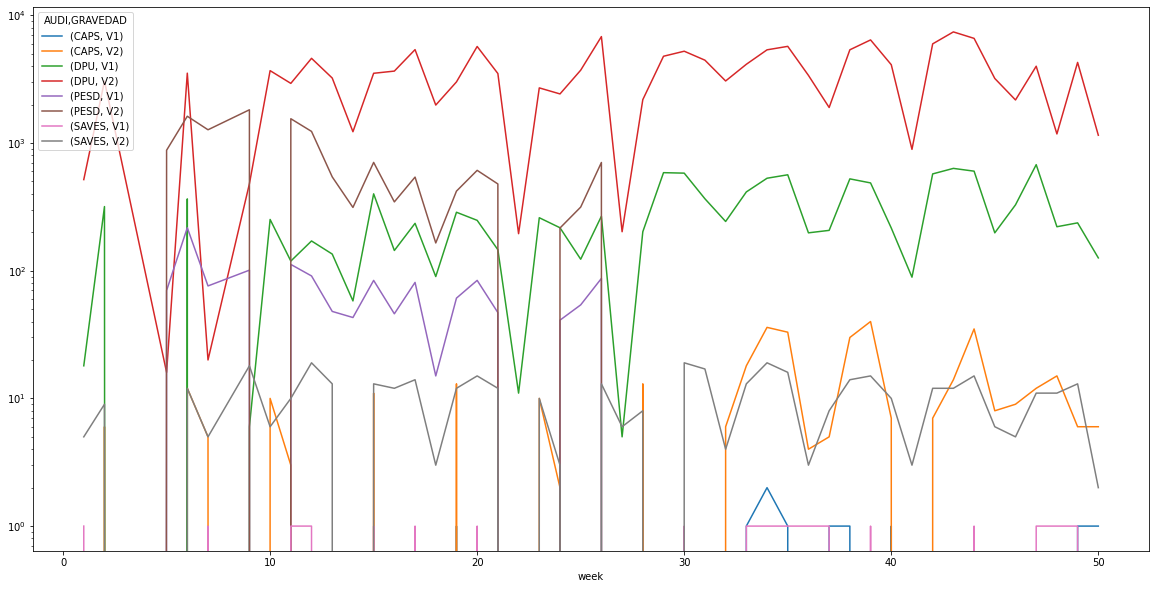

In [82]:
audi_gvt.plot(logy=True, figsize=(20,10))

In [75]:
v1 = df[df['GRAVEDAD']=='V1'].resample('1H').count()['ID'].to_frame().rename(columns={'ID':'V1'})
v2 = df[df['GRAVEDAD']=='V2'].resample('1H').count()['ID'].to_frame().rename(columns={'ID':'V2'})

In [76]:
total = v2.join(v1)

<AxesSubplot:xlabel='FECHA'>

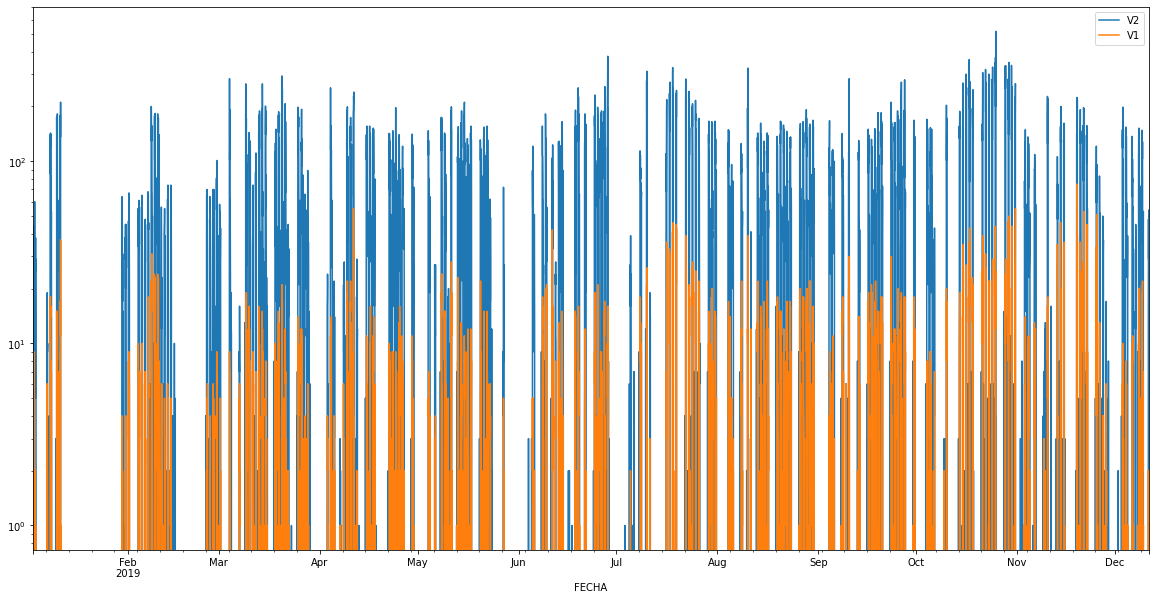

In [78]:
total.plot(logy=True, figsize=(20,10))

In [40]:
total['V1'] = total['V1'].fillna(0).astype(int)

In [41]:
total['zero'] = total.V1*total.V2

In [42]:
total_number = total[total.zero != 0]

<AxesSubplot:>

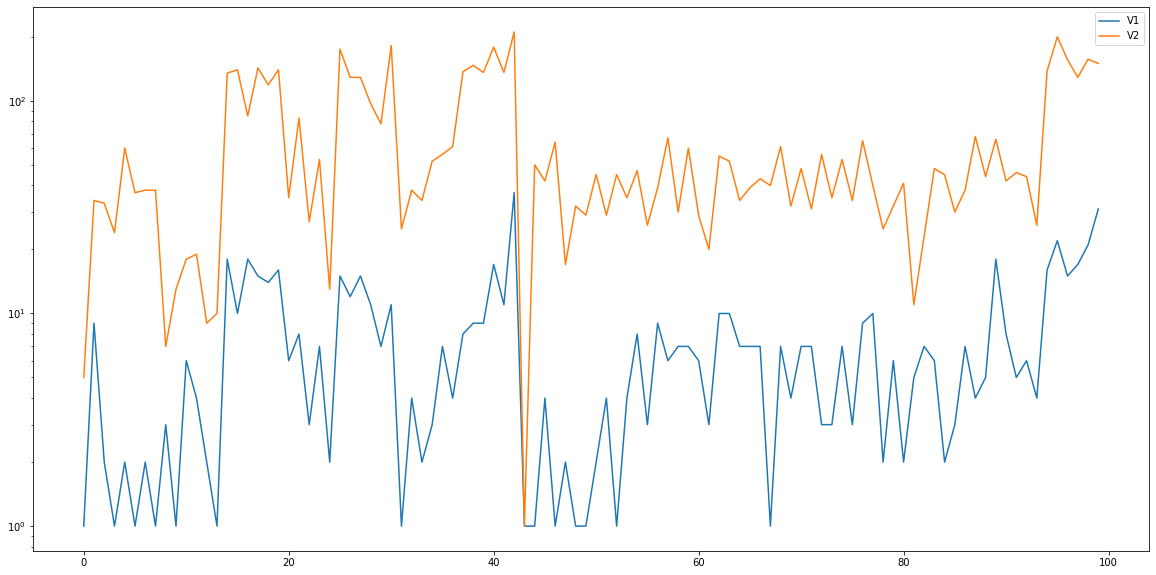

In [48]:
total_number.iloc[:100].reset_index()[['V1','V2']].plot(figsize=(20,10), logy=True)

In [416]:
total_number.reset_index

,V2,V1,zero
FECHA,,,
2019-01-03 00:00:00,5,1,5
2019-01-03 06:00:00,34,9,306
2019-01-03 09:00:00,33,2,66
2019-01-03 11:00:00,24,1,24
2019-01-03 12:00:00,60,2,120
...,...,...,...
2019-12-09 15:00:00,44,5,220
2019-12-09 17:00:00,53,1,53
2019-12-11 06:00:00,13,2,26


<AxesSubplot:xlabel='FECHA'>

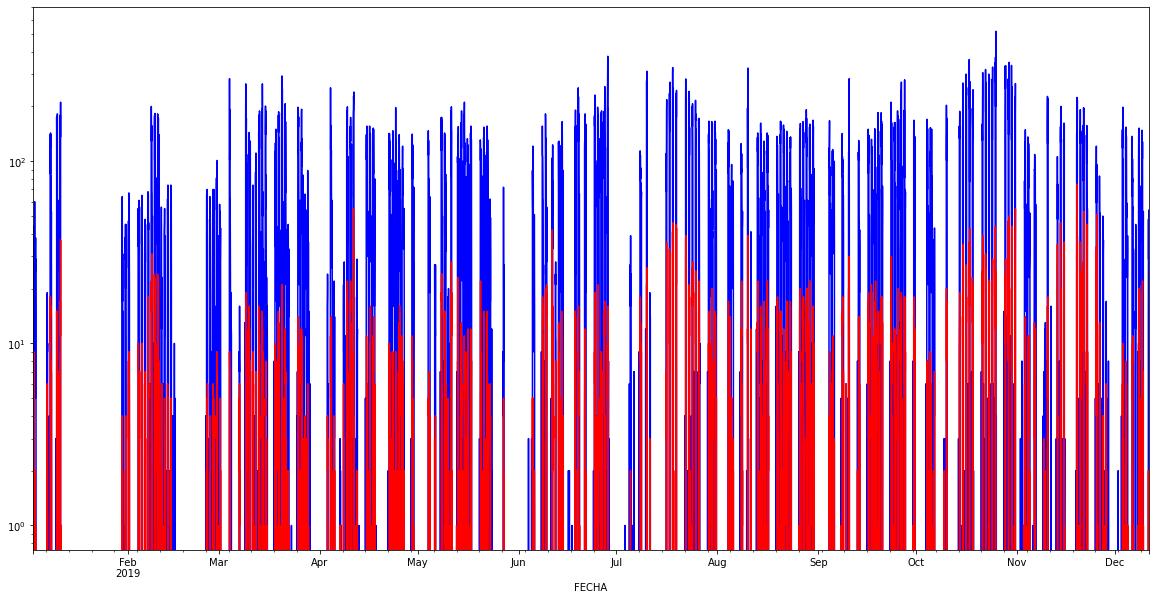

In [340]:
#v1.plot(c='r')
ax = v2.plot(c='b')
v1.plot(ax=ax, logy=True, c='r', figsize=(20,10))

#v2.plot(figsize=(20,10), logy=True, c='b')
#plt.show()

In [349]:
v2 = v2.to_frame()

In [352]:
v2 = v2[v2.ID != 0]

In [361]:
v1=v1.to_frame()

In [362]:
v1 = v1[v1.ID != 0]

In [366]:
total = v2.merge(v1, on='FECHA')

In [367]:
total

,ID_x,ID_y
FECHA,,
2019-01-03 00:00:00,5,1
2019-01-03 06:00:00,34,9
2019-01-03 09:00:00,33,2
2019-01-03 11:00:00,24,1
2019-01-03 12:00:00,60,2
...,...,...
2019-12-09 15:00:00,44,5
2019-12-09 17:00:00,53,1
2019-12-11 06:00:00,13,2


<AxesSubplot:>

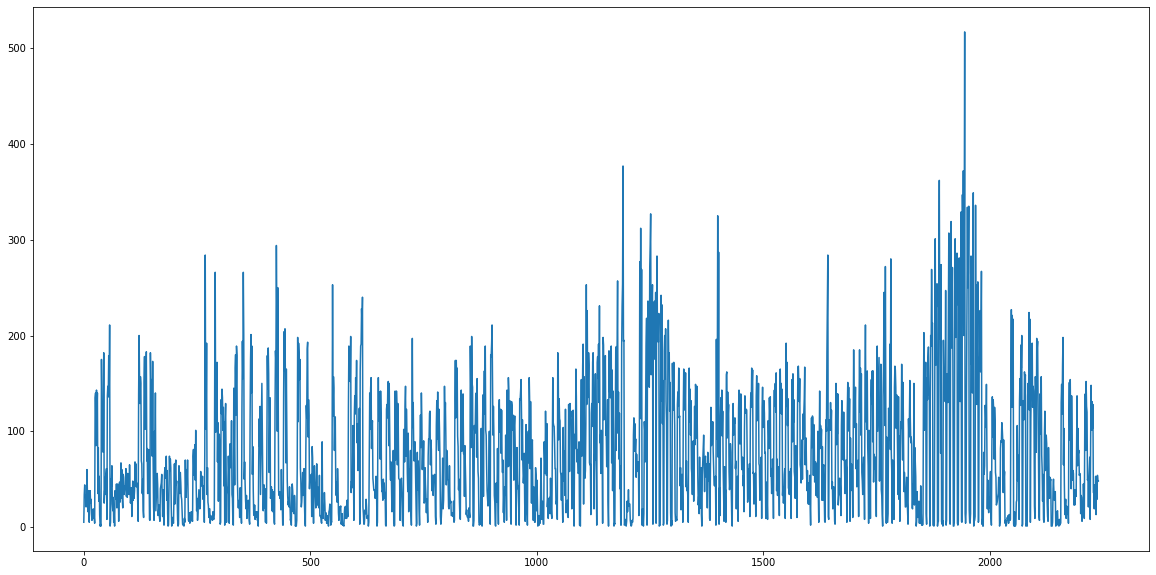

In [357]:
v2.reset_index().ID.plot(figsize=(20,10))

<AxesSubplot:>

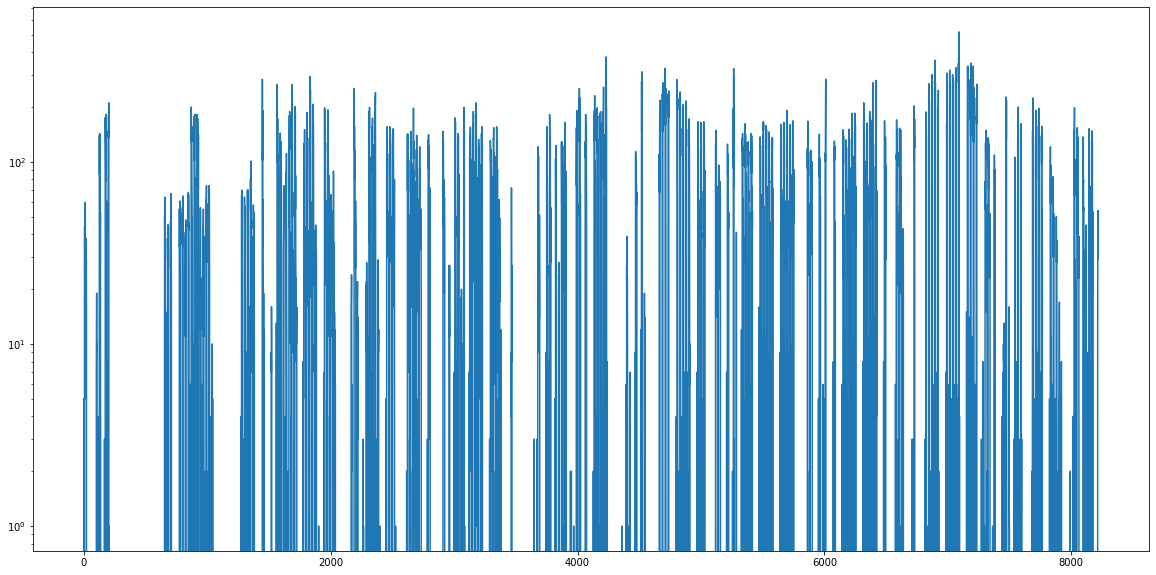

In [346]:
v2.reset_index()['ID'].plot(figsize=(20,10), logy=True)

In [311]:
print(vevo.head(20))

AttributeError: 'DatetimeIndexResampler' object has no attribute 'head'

In [300]:
v1_date = v1.groupby([v1.index.date, v1.index.hour])['ID'].count().to_frame()
v2_date = v2.groupby([v2.index.date, v2.index.hour])['ID'].count().to_frame()

In [306]:
v1_date.to_csv('v1.csv')

<AxesSubplot:xlabel='None,FECHA'>

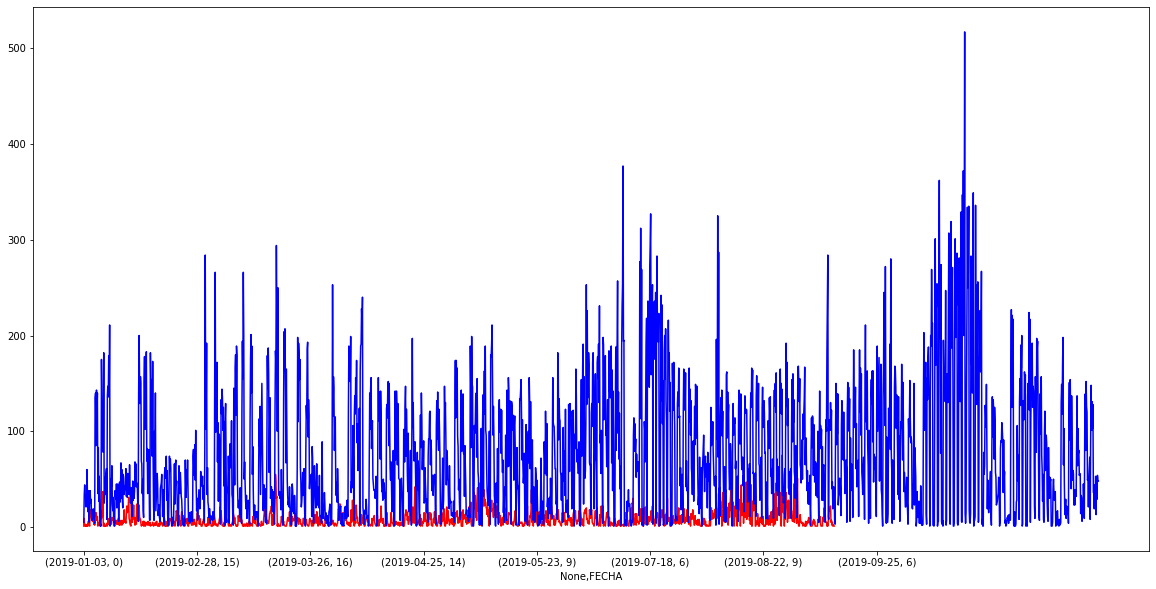

In [295]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 10))

v1 = df[df['GRAVEDAD']=='V1']
v2 = df[df['GRAVEDAD']=='V2']

v1.groupby([v1.index.date, v1.index.hour])['ID'].count().plot(c='r')
v2.groupby([v2.index.date, v2.index.hour])['ID'].count().plot(c='b')